In [5]:
import pandas as pd
ames_housing = pd.read_csv("../datasets/ames_housing_no_missing.csv")

target_name = "SalePrice"
data, target = ames_housing.drop(columns=target_name), ames_housing[target_name]
target = (target > 200_000).astype(int)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [7]:
data.head()


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,Grvl,Reg,Lvl,AllPub,Inside,...,0,0,Gd,MnPrv,Shed,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,Grvl,Reg,Lvl,AllPub,FR2,...,0,0,Gd,MnPrv,Shed,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,Grvl,IR1,Lvl,AllPub,Inside,...,0,0,Gd,MnPrv,Shed,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,Grvl,IR1,Lvl,AllPub,Corner,...,0,0,Gd,MnPrv,Shed,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,Grvl,IR1,Lvl,AllPub,FR2,...,0,0,Gd,MnPrv,Shed,0,12,2008,WD,Normal


In [8]:
numerical_columns = data.select_dtypes(include=['number']).columns
num_numerical_features = len(numerical_columns)
print(f"Number of numerical features: {num_numerical_features}")

Number of numerical features: 36


In [9]:
# Select columns with numerical data types
numerical_columns = data.select_dtypes(include=['number']).columns

# Assuming we have prior knowledge that 'Education_Level' and 'Rating' are ordinal
ordinal_columns = ['Education_Level', 'Rating']

# Filter out ordinal columns to keep only quantitative numerical columns
quantitative_numerical_columns = [col for col in numerical_columns if col not in ordinal_columns]

print(f"Quantitative numerical columns: {quantitative_numerical_columns}")



Quantitative numerical columns: ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']


In [10]:
numerical_features = [
  "LotFrontage", "LotArea", "MasVnrArea", "BsmtFinSF1", "BsmtFinSF2",
  "BsmtUnfSF", "TotalBsmtSF", "1stFlrSF", "2ndFlrSF", "LowQualFinSF",
  "GrLivArea", "BedroomAbvGr", "KitchenAbvGr", "TotRmsAbvGrd", "Fireplaces",
  "GarageCars", "GarageArea", "WoodDeckSF", "OpenPorchSF", "EnclosedPorch",
  "3SsnPorch", "ScreenPorch", "PoolArea", "MiscVal",
]

In [11]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_validate


data_numerical = data[numerical_features]

model = make_pipeline(StandardScaler(), LogisticRegression())
cv_results_num = cross_validate(model, data_numerical, target, cv=10)
test_score_num = cv_results_num["test_score"]
test_score_num.mean()

0.891780821917808

In [12]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder

categorical_features = data.columns.difference(numerical_features)

categorical_processor = OneHotEncoder(handle_unknown="ignore")
numerical_processor = StandardScaler()

preprocessor = make_column_transformer(
    (categorical_processor, categorical_features),
    (numerical_processor, numerical_features),
)
model = make_pipeline(preprocessor, LogisticRegression(max_iter=1_000))
cv_results_all = cross_validate(model, data, target, cv=10)
test_score_all = cv_results_all["test_score"]
test_score_all.mean()

0.9171232876712327

A model using all features is better than a model using only numerical features for 9 CV iterations out of 10.


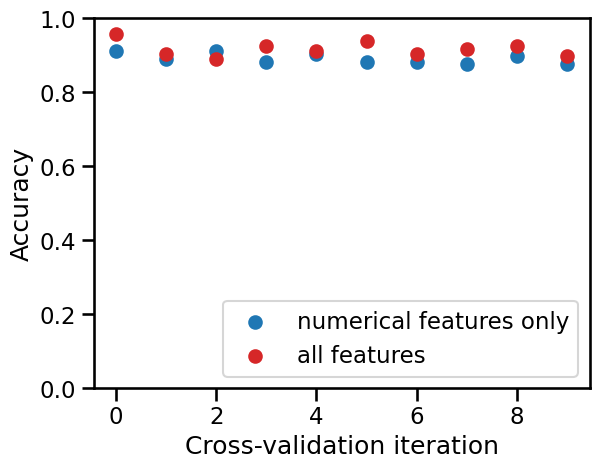

In [13]:
import numpy as np
import matplotlib.pyplot as plt

indices = np.arange(len(test_score_num))
plt.scatter(
    indices, test_score_num, color="tab:blue", label="numerical features only"
)
plt.scatter(
    indices,
    test_score_all,
    color="tab:red",
    label="all features",
)
plt.ylim((0, 1))
plt.xlabel("Cross-validation iteration")
plt.ylabel("Accuracy")
_ = plt.legend(loc="lower right")

print(
    "A model using all features is better than a"
    " model using only numerical features for"
    f" {sum(test_score_all > test_score_num)} CV iterations out of 10."
)